# Patient Readmission
## Data Demo
### Source: Drake Cofta
### Date: 10/24/25

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

### Load Data

In [9]:
df = pd.read_csv("C:/Users/reinacherc/Downloads/diabetes+130-us+hospitals+for+years+1999-2008 (1)\diabetic_data.csv")


<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\reinacherc\AppData\Local\Temp\ipykernel_2360\1336132409.py:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  df = pd.read_csv("C:/Users/reinacherc/Downloads/diabetes+130-us+hospitals+for+years+1999-2008 (1)\diabetic_data.csv")


In [12]:
with open("C:/Users/reinacherc/Downloads/diabetes+130-us+hospitals+for+years+1999-2008 (1)/IDS_mapping.csv", 'r') as f:
    mapping = f.read()

### Inspect and Clean

In [13]:
print("\nInitial Data Shape:", df.shape)
print("\nFirst 5 rows of the data:")
df.head()


Initial Data Shape: (101766, 50)

First 5 rows of the data:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [14]:
# Replace Symbols
df.replace('?', np.nan, inplace=True)


In [15]:
# Calculate percentage of missing values per column
missing_info = df.isnull().sum()
missing_info = missing_info[missing_info > 0].sort_values(ascending=False)
missing_percent = (missing_info / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_info,
    'Missing %': missing_percent.round(2)
})

print("Columns with Missing Values ('?') or 'Unknown/Invalid':")
print(missing_df)


Columns with Missing Values ('?') or 'Unknown/Invalid':
                   Missing Count  Missing %
weight                     98569      96.86
max_glu_serum              96420      94.75
A1Cresult                  84748      83.28
medical_specialty          49949      49.08
payer_code                 40256      39.56
race                        2273       2.23
diag_3                      1423       1.40
diag_2                       358       0.35
diag_1                        21       0.02


In [16]:
# Drop 'weight', 'payer_code', and 'medical_specialty' due to high missing percentage
cols_to_drop = missing_df[missing_df['Missing %'] > 30].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)
print(f"\nDropped columns due to high missing percentage: {cols_to_drop}")


Dropped columns due to high missing percentage: ['weight', 'max_glu_serum', 'A1Cresult', 'medical_specialty', 'payer_code']


## EDA


Target Variable Distribution (Readmitted vs. Not Readmitted):
Not Readmitted (0): 53.91%
Readmitted (1): 46.09%


C:\Users\reinacherc\AppData\Local\Temp\ipykernel_2360\2698184035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='age', data=df, order=df['age'].value_counts().index, palette='viridis')


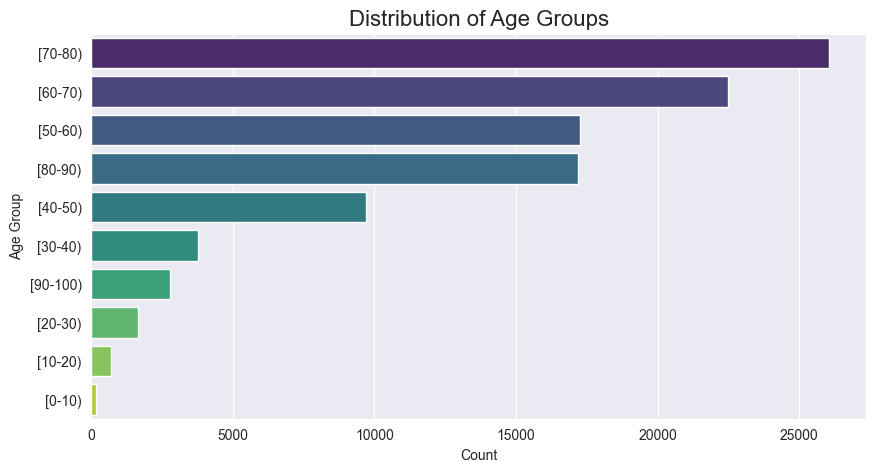

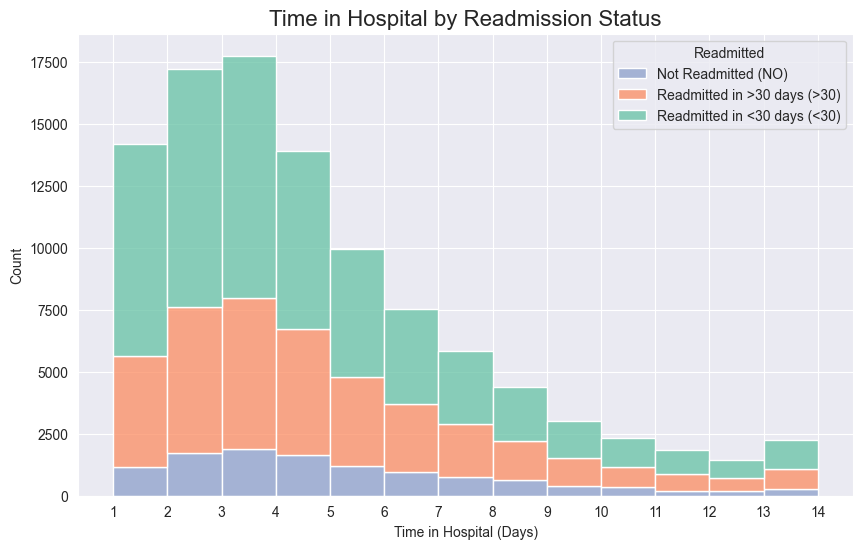

C:\Users\reinacherc\AppData\Local\Temp\ipykernel_2360\2698184035.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=all_diagnoses, order=all_diagnoses.value_counts().index[:top_n], palette='rocket')


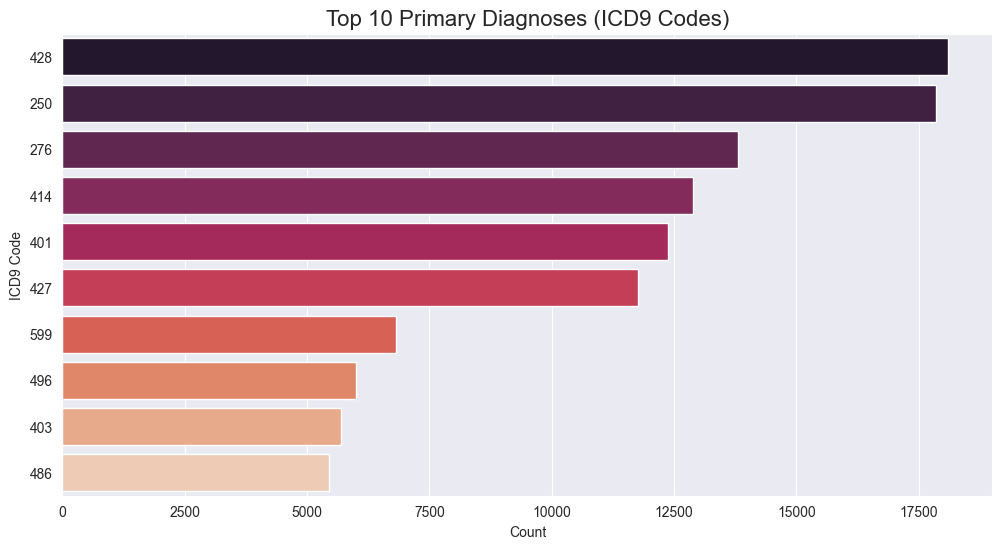

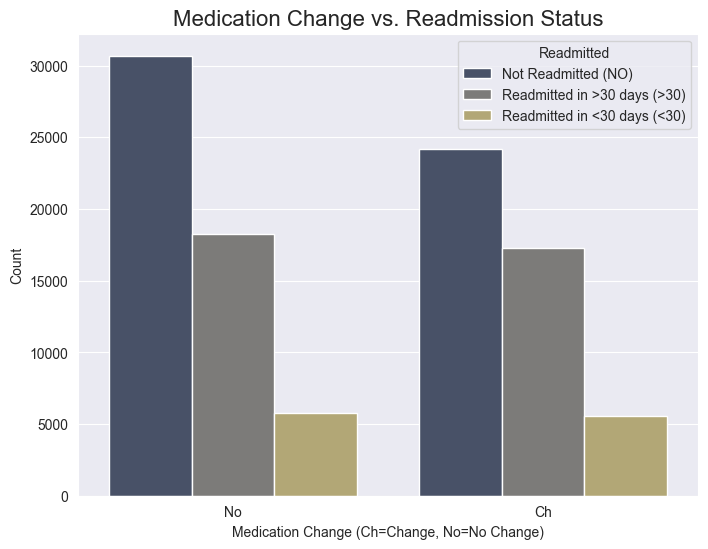

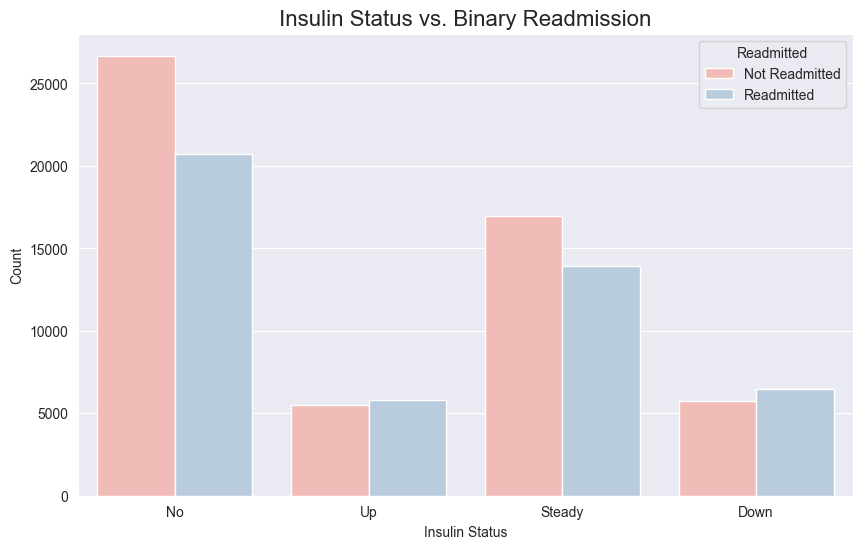

In [17]:
# A. Target Variable Analysis: Readmission
# Recode 'readmitted' to simplify: 'NO' -> 0, '<30' or '>30' -> 1 (Readmitted)
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

readmission_counts = df['readmitted_binary'].value_counts(normalize=True).mul(100).round(2)
print("\nTarget Variable Distribution (Readmitted vs. Not Readmitted):")
print(f"Not Readmitted (0): {readmission_counts.get(0, 0)}%")
print(f"Readmitted (1): {readmission_counts.get(1, 0)}%")

# B. Age Distribution
plt.figure(figsize=(10, 5))
sns.countplot(y='age', data=df, order=df['age'].value_counts().index, palette='viridis')
plt.title('Distribution of Age Groups', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.show()
print("")


# C. Distribution of Time in Hospital vs. Readmission
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time_in_hospital', hue='readmitted', multiple='stack', bins=range(1, 15), palette='Set2')
plt.title('Time in Hospital by Readmission Status', fontsize=16)
plt.xlabel('Time in Hospital (Days)')
plt.ylabel('Count')
plt.xticks(range(1, 15))
plt.legend(title='Readmitted', labels=['Not Readmitted (NO)', 'Readmitted in >30 days (>30)', 'Readmitted in <30 days (<30)'])
plt.show()
print("")

# D. Top Diagnoses
# Combining the first three diagnosis columns for a top-N analysis
diag_cols = ['diag_1', 'diag_2', 'diag_3']
# FIX: Use reset_index(drop=True) to create a unique, default index after concatenation
all_diagnoses = pd.concat([df[col].dropna() for col in diag_cols]).reset_index(drop=True)

# Plotting top 10 diagnoses
plt.figure(figsize=(12, 6))
top_n = 10
sns.countplot(y=all_diagnoses, order=all_diagnoses.value_counts().index[:top_n], palette='rocket')
plt.title(f'Top {top_n} Primary Diagnoses (ICD9 Codes)', fontsize=16)
plt.xlabel('Count')
plt.ylabel('ICD9 Code')
plt.show()
print("")

# E. Medication Change vs. Readmission
plt.figure(figsize=(8, 6))
sns.countplot(x='change', hue='readmitted', data=df, palette='cividis')
plt.title('Medication Change vs. Readmission Status', fontsize=16)
plt.xlabel('Medication Change (Ch=Change, No=No Change)')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['Not Readmitted (NO)', 'Readmitted in >30 days (>30)', 'Readmitted in <30 days (<30)'])
plt.show()
print("")


# F. Insulin Usage vs. Readmission
plt.figure(figsize=(10, 6))
sns.countplot(x='insulin', hue='readmitted_binary', data=df, palette='Pastel1')
plt.title('Insulin Status vs. Binary Readmission', fontsize=16)
plt.xlabel('Insulin Status')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()
print("")

### Machine Learning Prep

In [18]:
# Create the primary target for hospital prediction: Readmitted in less than 30 days
# '<30' = 1 (Critical Readmission), 'NO' or '>30' = 0 (Not Critical Readmission)
df['critical_readmit'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

critical_readmit_counts = df['critical_readmit'].value_counts(normalize=True).mul(100).round(2)
print("New Target Variable Distribution (Critical Readmission <30 days):")
print(f"Not Critical Readmission (0): {critical_readmit_counts.get(0, 0)}%")
print(f"Critical Readmission (1): {critical_readmit_counts.get(1, 0)}%")

# Drop the original 'readmitted' column as it is multi-class
df.drop(columns=['readmitted'], inplace=True)
print("Original 'readmitted' column dropped. 'critical_readmit' is the new binary target.")


New Target Variable Distribution (Critical Readmission <30 days):
Not Critical Readmission (0): 88.84%
Critical Readmission (1): 11.16%
Original 'readmitted' column dropped. 'critical_readmit' is the new binary target.


In [19]:
df.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)
print("Dropped unique identifier columns: 'encounter_id', 'patient_nbr'.")

# Identify remaining categorical columns and review their cardinality for encoding
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\nCardinality of Categorical Features (for ML Encoding planning):")
for col in categorical_cols:
    print(f"- {col}: {df[col].nunique()} unique values")

Dropped unique identifier columns: 'encounter_id', 'patient_nbr'.

Cardinality of Categorical Features (for ML Encoding planning):
- race: 5 unique values
- gender: 3 unique values
- age: 10 unique values
- diag_1: 716 unique values
- diag_2: 748 unique values
- diag_3: 789 unique values
- metformin: 4 unique values
- repaglinide: 4 unique values
- nateglinide: 4 unique values
- chlorpropamide: 4 unique values
- glimepiride: 4 unique values
- acetohexamide: 2 unique values
- glipizide: 4 unique values
- glyburide: 4 unique values
- tolbutamide: 2 unique values
- pioglitazone: 4 unique values
- rosiglitazone: 4 unique values
- acarbose: 4 unique values
- miglitol: 4 unique values
- troglitazone: 2 unique values
- tolazamide: 3 unique values
- examide: 1 unique values
- citoglipton: 1 unique values
- insulin: 4 unique values
- glyburide-metformin: 4 unique values
- glipizide-metformin: 2 unique values
- glimepiride-pioglitazone: 2 unique values
- metformin-rosiglitazone: 2 unique values
